In [1]:
#code needed to fix the KMeans error for less chunks than available threads, got from the XLA, has to run before the importing KMeans
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']])
market_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [9]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
        market_data_scaled,
        columns=['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']
)

# Copy the crypto names from the original DataFrame
df_market_data_scaled['Crypto Currency'] = df_market_data.index 

# Set the coin_id column as index
df_market_data_scaled = df_market_data_scaled.set_index('Crypto Currency')

# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Crypto Currency,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [12]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [13]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

In [14]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd. DataFrame(elbow_data)

df_elbow.head()

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051


In [15]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks = k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [19]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters = 3, random_state=0)

In [20]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_data_scaled)

KMeans(n_clusters=3, random_state=0)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predict_3 = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
predict_3

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0])

In [22]:
# Create a copy of the scaled DataFrame
df_market_data_predictions = df_market_data_scaled.copy()

In [23]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_predictions['segment'] = predict_3

# Display the copy of the scaled DataFrame
df_market_data_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,segment
Crypto Currency,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [24]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

df_market_data_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by='segment',
    hover_cols=['Crypto Currency'],
    title="Cryptocurrency Price Change Percentage",
    xlabel="24 Hour Price Change %",
    ylabel="7 Day Price Change %"
)
    

:NdOverlay   [segment]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Crypto Currency)

---

### Optimize Clusters with Principal Component Analysis.

In [27]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [28]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
crypto_pca = pca.fit_transform(df_market_data_scaled)

# View the scaled PCA data
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [29]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** About 89.4% of the total variance in condensed into the 3 PCA variables

In [31]:
# Create a new DataFrame with the PCA data.
crypto_pca_df = pd.DataFrame(
    crypto_pca,
    columns=["PCA1", 'PCA2', 'PCA3']
)
    
# Copy the crypto names from the original scaled DataFrame
crypto_pca_df['Cryptocurrency'] = df_market_data_scaled.index 

# Set the coin_id column as index
crypto_pca_df = crypto_pca_df.set_index('Cryptocurrency')

# Display the scaled PCA DataFrame
crypto_pca_df.head()

,PCA1,PCA2,PCA3
Cryptocurrency,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [34]:
# Create a list with the number of k-values from 1 to 11
pca_k = list(range(1,11))

In [35]:
# Create an empty list to store the inertia values
pca_inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in pca_k:
    pca_k_model = KMeans(n_clusters=i, random_state=0)
    pca_k_model.fit(crypto_pca_df)
    pca_inertia.append(pca_k_model.inertia_)    

In [36]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {"k": pca_k, "inertia": pca_inertia}
# Create a DataFrame with the data to plot the Elbow curve
pca_df_elbow = pd.DataFrame(elbow_data)

pca_df_elbow.head()

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051


In [37]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pca_df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=pca_k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [40]:
# Initialize the K-Means model using the best value for k
scaled_pca_model = KMeans(n_clusters = 3, random_state=0)

In [41]:
# Fit the K-Means model using the PCA data
scaled_pca_model.fit(crypto_pca_df)

KMeans(n_clusters=3, random_state=0)

In [42]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame

predict_pca_3 = scaled_pca_model.predict(crypto_pca_df)

# Print the resulting array of cluster values.
predict_pca_3


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0])

In [43]:
# Create a copy of the scaled PCA DataFrame
pca_predictions_df = crypto_pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_predictions_df['segment'] = predict_pca_3

# Display the copy of the scaled PCA DataFrame
pca_predictions_df.head()

,PCA1,PCA2,PCA3,segment
Cryptocurrency,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [44]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by='segment',
    hover_cols=['Cryptocurrency'],
    title="Cryptocurrency Cluster / PCA",
    xlabel="PCA 1",
    ylabel="PCA 2"
)
    

:NdOverlay   [segment]
   :Scatter   [PCA1]   (PCA2,Cryptocurrency)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

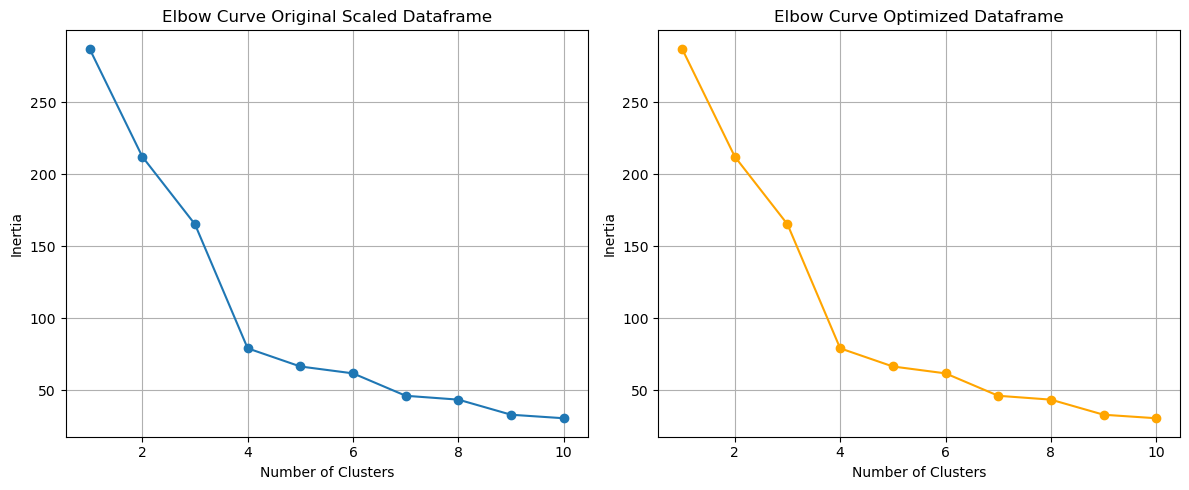

In [46]:
# Composite plot to contrast the Elbow curves

#Data for the 2 curves
k_values = list(range(1,11))
elbow_curve_1 = df_elbow['inertia']
elbow_curve_2 = pca_df_elbow['inertia']

# Create a composite plot
fig, axs = plt.subplots(1, 2, figsize=(12,5))

#Plot First elbow curve
axs[0].plot(k_values, elbow_curve_1, marker='o')
axs[0].set_title('Elbow Curve Original Scaled Dataframe')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Inertia')
axs[0].grid()

# Plot 2nd elbow curve
axs[1].plot(k_values, elbow_curve_2, marker='o', color='orange')
axs[1].set_title('Elbow Curve Optimized Dataframe')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('Inertia')
axs[1].grid()

# composite plot
plt.tight_layout()
plt.show()

In [47]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Fewer features allow for segments that can be grouped together better and get more impoactful data analysis from.